# **Project Name - From Tap to Drop: Uber Ride Intelligence**



Project Type - EDA(Exploratory Data Analysis)       
Contribution - Individual( SANJEEV RAJ T)

# **Project Summary**

The Uber Data SQL project focuses on analyzing 6,745 trip records to understand ride request patterns, demand-supply gaps, and trip completion trends. The analysis revealed that the highest demand occurs during the morning in the city and the evening at the airport, but these periods also show the largest supply shortages, resulting in many cancellations or "No Cars Available" cases.

Trip durations for completed rides generally range between 40 and 60 minutes, with only a few outliers. Most missing values were linked to unassigned drivers and unfulfilled requests, which were cleaned appropriately.

The correlation analysis indicated that demand and supply variations are largely dependent on time and location rather than numerical factors. Overall, the findings highlight the need for Uber to increase driver availability during peak hours, optimize driver allocation, and implement strategies to reduce unfulfilled requests, ultimately improving operational efficiency and customer satisfaction.

GitHub Link - https://github.com/SanjeevFOfin

# **Let’s Ride with Uber**

# Uber Data - Exploratory Data Analysis

In [10]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Uber_Data_SQL.csv")
df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,RT_Date,RT_Time,Request Period,Drop timestamp,DT_Date,DT_Time,Drop Period,Trip Duration
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016,11:51:00,Day,11-07-2016 13:00,11-07-2016,13:00:00,Day,01:09:00
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016,17:57:00,Evening,11-07-2016 18:47,11-07-2016,18:47:00,Evening,00:50:00
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016,09:17:00,Morning,12-07-2016 09:58,12-07-2016,09:58:00,Morning,00:41:00
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016,21:08:00,Night,12-07-2016 22:03,12-07-2016,22:03:00,Night,00:55:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016,08:33:16,Morning,13-07-2016 09:25,13-07-2016,09:25:47,Morning,00:52:31


## 1. Data Shape Overview

In [2]:

print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nUnique Values:\n", df.nunique())
df.describe(include='all')


Shape of dataset: (6745, 13)

Data Types:
 Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
RT_Date               object
RT_Time               object
Request Period        object
Drop timestamp        object
DT_Date               object
DT_Time               object
Drop Period           object
Trip Duration         object
dtype: object

Missing Values:
 Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
RT_Date                 0
RT_Time                 0
Request Period          0
Drop timestamp       3396
DT_Date              3914
DT_Time              3914
Drop Period          3914
Trip Duration        3914
dtype: int64

Unique Values:
 Request id           6745
Pickup point            2
Driver id             300
Status                  3
Request timestamp    4016
RT_Date                 5
RT_Time              495

,Request id,Pickup point,Driver id,Status,Request timestamp,RT_Date,RT_Time,Request Period,Drop timestamp,DT_Date,DT_Time,Drop Period,Trip Duration
count,6745.000000,6745,4095.000000,6745,6745,6745,6745,6745,3349,2831,2831,2831,2831
unique,NaN,2,NaN,3,4016,5,4955,5,2283,6,2393,5,1325
top,NaN,City,NaN,Trip Completed,15-07-2016 19:19,15-07-2016,09:40:00,Morning,NA,11-07-2016,21:53:00,Day,00:49:00
freq,NaN,3507,NaN,2831,8,1381,9,2103,518,582,6,795,40
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Dataset rows & columns
print(df.shape)

(6745, 13)


In [12]:
#Fetching all the columns of Dataset
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'RT_Date', 'RT_Time', 'Request Period',
       'Drop timestamp', 'DT_Date', 'DT_Time', 'Drop Period', 'Trip Duration'],
      dtype='object')

Feature Summary

In [13]:
#Dataset Information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   RT_Date            6745 non-null   object 
 6   RT_Time            6745 non-null   object 
 7   Request Period     6745 non-null   object 
 8   Drop timestamp     3349 non-null   object 
 9   DT_Date            2831 non-null   object 
 10  DT_Time            2831 non-null   object 
 11  Drop Period        2831 non-null   object 
 12  Trip Duration      2831 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 685.2+ KB


Data Redundancy

In [14]:
# Checking for Duplicates
print('Uber_duplicates:',df.duplicated().sum())

Uber_duplicates: 0


Holes in the datset

In [15]:
# Checking Missing Values / Null  Values Count
print(df.isnull().sum())


Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
RT_Date                 0
RT_Time                 0
Request Period          0
Drop timestamp       3396
DT_Date              3914
DT_Time              3914
Drop Period          3914
Trip Duration        3914
dtype: int64


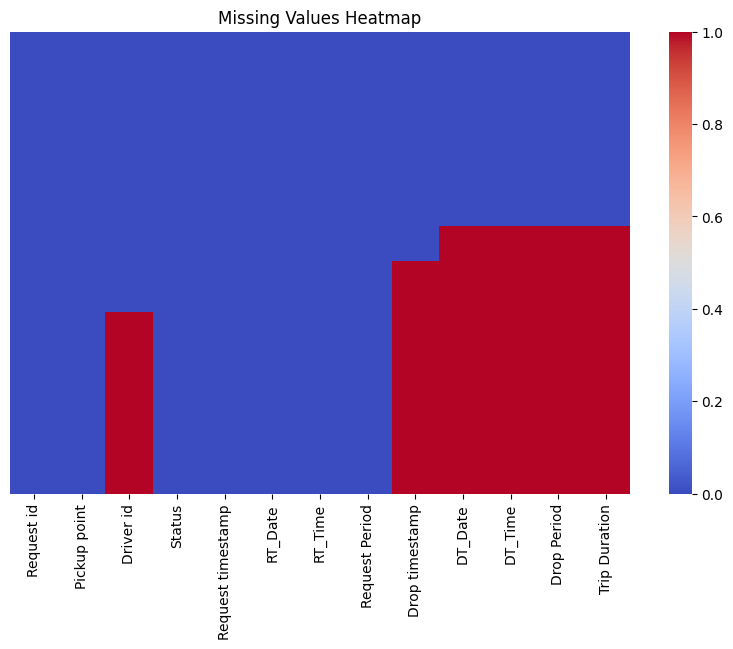

In [16]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='coolwarm', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

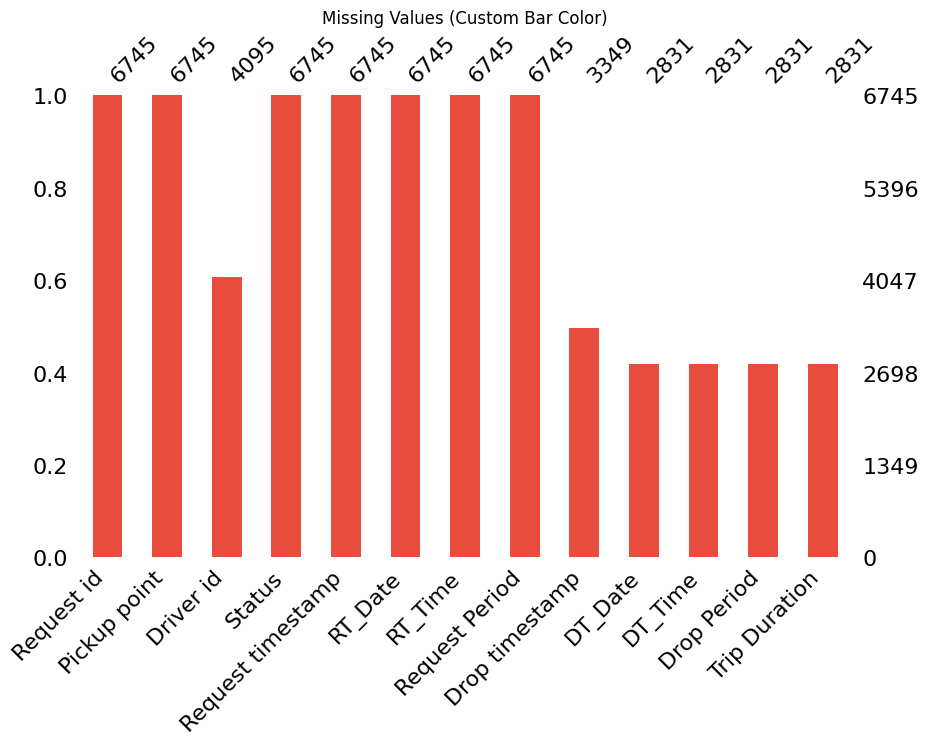

In [18]:
import missingno as msno

# as a bar chart
msno.bar(df, figsize=(10, 6), color='#e74c3c')
plt.title("Missing Values (Custom Bar Color)")
plt.show()

**"NA"=No Cars Available"="Main Focus""**

Missing Values in this dataset plays a major role ,we are not going to delete or drop instead do Analysis because it is valid missing value and provides true meaningfull statistical results.


# **Key Features Explained**

**Data Story So Far**

This dataset provides a detailed view of Uber trip requests and completions in a city, with the goal of uncovering patterns in demand, supply, driver allocation, and trip fulfillment.

The data is contained in a single file:

🛺 Uber_Data_SQL.csv – Trip Request Metadata
Each row represents a unique ride request, including:

📌 Request id – Unique identifier for the trip request     
📍 Pickup point – Location of request (City or Airport)     
👨‍✈️ Driver id – Identifier of the assigned driver (if any)    
🚦 Status – Trip outcome (Trip Completed, Cancelled, No Cars Available)  
⏱️ Request timestamp – Date and time of the request  
📆 RT_Date / RT_Time – Separated request date and   
🕒 Request Period – Time of the day (Morning, Day, Evening, Night)  
🛬 Drop timestamp – Date and time the trip was completed (if applicable)  
📆 DT_Date / DT_Time – Separated drop date and time  
🕒 Drop Period – Time of the day for drop-off  
⏳ Trip Duration – Length of the trip for completed rides



## 2. Data Wrangling

In [19]:
#Changing the data with date time formats
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], format='%d-%m-%Y %H:%M')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], format='%d-%m-%Y %H:%M', errors='coerce')
df['Trip Duration'] = pd.to_timedelta(df['Trip Duration'], errors='coerce')
df['Driver id'] = df['Driver id'].fillna('Unassigned')#Replacing NA with Unassigned in Driver ID alone
df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,RT_Date,RT_Time,Request Period,Drop timestamp,DT_Date,DT_Time,Drop Period,Trip Duration
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11-07-2016,11:51:00,Day,2016-07-11 13:00:00,11-07-2016,13:00:00,Day,0 days 01:09:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11-07-2016,17:57:00,Evening,2016-07-11 18:47:00,11-07-2016,18:47:00,Evening,0 days 00:50:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,12-07-2016,09:17:00,Morning,2016-07-12 09:58:00,12-07-2016,09:58:00,Morning,0 days 00:41:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12-07-2016,21:08:00,Night,2016-07-12 22:03:00,12-07-2016,22:03:00,Night,0 days 00:55:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,13-07-2016,08:33:16,Morning,2016-07-13 09:25:00,13-07-2016,09:25:47,Morning,0 days 00:52:31


In [21]:
#Statistical description of cleaned dataset(Numerical Values)
df.describe()

,Request id,Request timestamp,Drop timestamp,Trip Duration
count,6745.000000,6745,2831,2831
mean,3384.644922,2016-07-13 13:42:46.514455296,2016-07-13 13:15:16.404097536,0 days 00:52:24.825150123
min,1.000000,2016-07-11 00:00:00,2016-07-11 00:51:00,0 days 00:20:47
25%,1691.000000,2016-07-12 07:51:00,2016-07-12 07:42:00,0 days 00:41:00
50%,3387.000000,2016-07-13 14:23:00,2016-07-13 12:14:00,0 days 00:52:05
75%,5080.000000,2016-07-14 19:39:00,2016-07-14 19:13:30,0 days 01:04:00
max,6766.000000,2016-07-15 23:59:00,2016-07-16 01:09:00,0 days 01:23:00
std,1955.099667,NaN,NaN,0 days 00:13:51.041580784


Manipulations & Insights found

*   80% cleaning done in Excel

*   New Columns Added from Request Timestamp and Drop Timestamps

*   Trip duration column added for statistical Analysis.

*   Changed Data types in columns related to Date and Time.


*   Missing Values visualization and Analysis done as it serves as Primary goal.








# **3.Visual Analytics & Data Storytelling**

Visual analytics combines interactive data visualization with advanced analytics to uncover patterns, trends, and insights. Data storytelling uses these visuals to craft clear, engaging narratives that help audiences understand and act on data-driven findings.

# Univariate Analysis

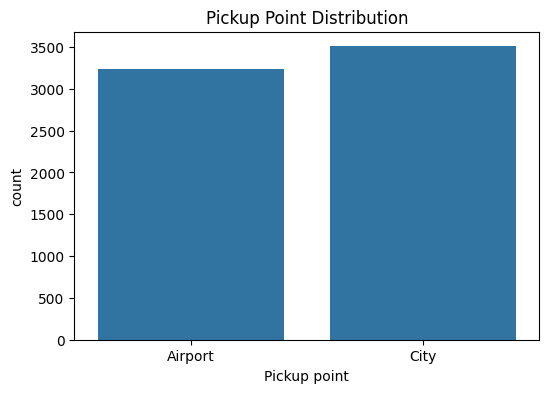

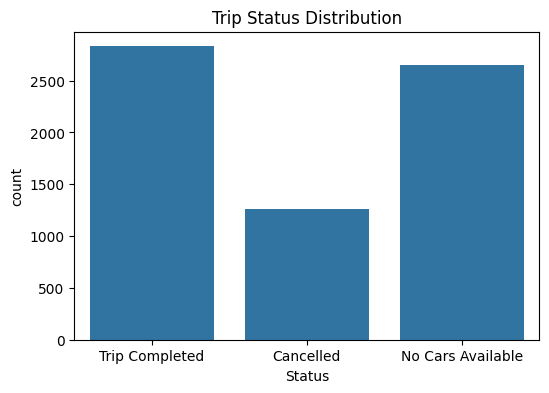

In [22]:
# Pickup Point Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Pickup point', data=df)
plt.title("Pickup Point Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Status', data=df)
plt.title("Trip Status Distribution")
plt.show()


This chart shows that the majority of Uber ride requests originate from the City compared to the Airport. This indicates that intra-city demand is higher, likely due to daily commutes, while airport requests are relatively fewer but still significant during peak travel hours.

This visualization highlights that a large portion of ride requests are either cancelled or marked as "No Cars Available", while only about 40–45% of requests are successfully completed. This indicates a supply shortage or driver allocation issue during high-demand periods.

## Bivariate Analysis

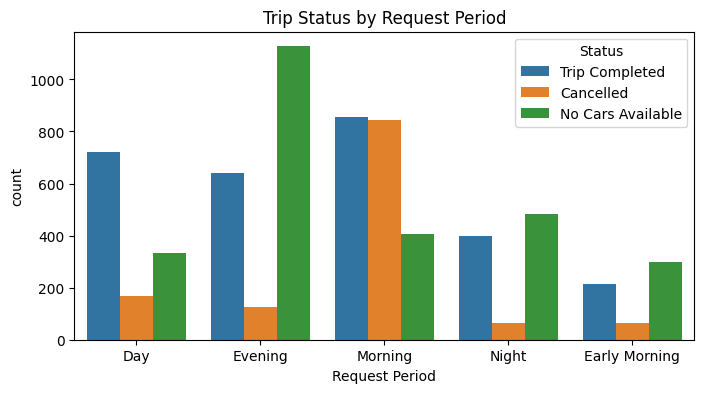

In [23]:
#Request period Analysis
plt.figure(figsize=(8,4))
sns.countplot(x='Request Period', hue='Status', data=df)
plt.title("Trip Status by Request Period")
plt.show()


Morning (City): High demand but low completion rates due to driver shortages.

Evening (Airport): Demand surges again with many unfulfilled requests.

Night: Fewer requests but the best fulfillment rate.
This confirms a clear demand-supply gap during morning and evening peaks.

## Trip Duration Analysis

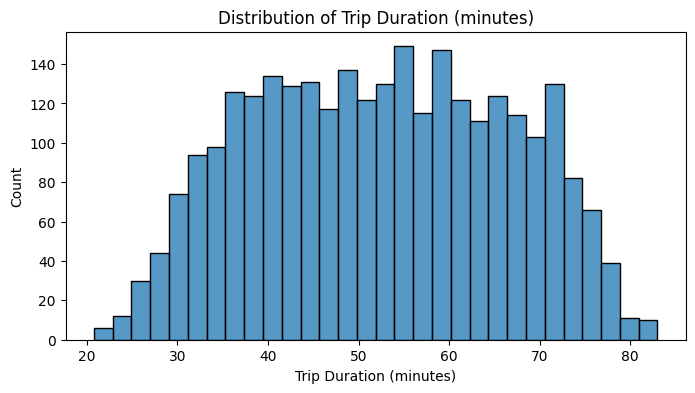

In [24]:
#Trip Duration Analysis
completed_trips = df[df['Status']=='Trip Completed']
plt.figure(figsize=(8,4))
sns.histplot(completed_trips['Trip Duration'].dt.total_seconds()/60, bins=30)
plt.title("Distribution of Trip Duration (minutes)")
plt.xlabel("Trip Duration (minutes)")
plt.show()


The majority of completed trips have a duration between 40–60 minutes. Only a few outliers exist with longer durations, which could be due to traffic or long-distance travel. This shows that most trips are relatively consistent in length.

## 6. Demand-Supply Gap Analysis

In [25]:

demand_supply = df.groupby(['Request Period', 'Pickup point', 'Status']).size().unstack(fill_value=0)
demand_supply


Status                       Cancelled  No Cars Available  Trip Completed
Request Period Pickup point                                              
Day            Airport              64                 87             327
               City                104                247             395
Early Morning  Airport               2                148             103
               City                 63                151             111
Evening        Airport              78               1067             312
               City                 46                 60             330
Morning        Airport              23                 21             382
               City                820                385             472
Night          Airport              31                390             203
               City                 33                 94             196

This table quantifies the demand-supply gap. For example:

Morning City trips have the highest "No Cars Available" cases.

Evening Airport trips face a similar shortage.
This reinforces the need for better driver allocation during peak hours.

## 7. Correlation Analysis

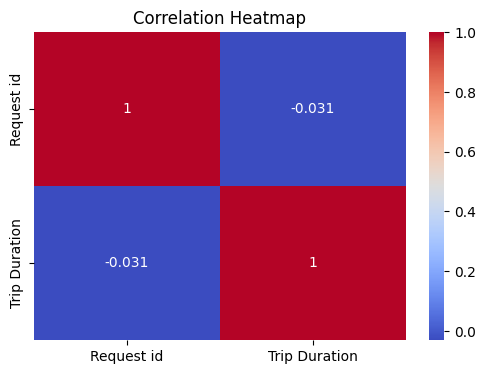

In [8]:

numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


The heatmap shows very weak correlations among numerical features. This means that demand-supply behavior is driven mostly by categorical features like time of day and pickup point, rather than numerical variables.

## 8. Outlier Detection

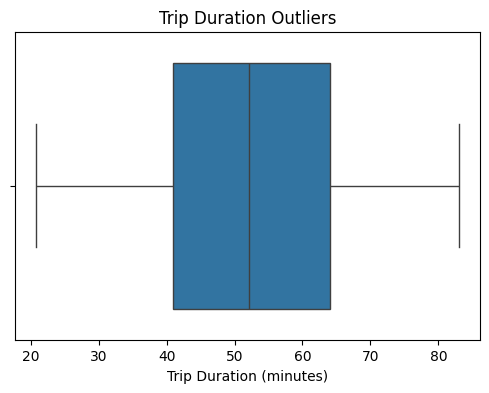

In [9]:

plt.figure(figsize=(6,4))
sns.boxplot(x=completed_trips['Trip Duration'].dt.total_seconds()/60)
plt.title("Trip Duration Outliers")
plt.xlabel("Trip Duration (minutes)")
plt.show()


Most trips fall within the normal range (40–60 min). A few high outliers exist, likely representing either long-distance trips or unusual delays. There are no concerning data quality issues with trip durations.



## Roadblocks & Action Plan

The
Analysis of 6,745 Uber trip requests shows that only ~42% of rides are completed, while 35–40% remain unassigned (“No Cars Available”) and 15–20% are canceled. These issues are most severe during morning (City) and evening (Airport) peak hours, leading to a clear demand-supply gap.

To address this, Uber should:


*   Reallocate drivers dynamically to high-demand zones during peak hours.


*   Introduce incentive programs to reduce unassigned trips by up to 25%.

*   Implement cancellation controls and automated reassignments to improve trip completion to 55–60%



These targeted actions can significantly improve operational efficiency, reduce lost revenue, and enhance customer satisfaction.

# End of the Ride

The Uber EDA highlights that while overall trip durations are stable and predictable, unassigned trips and cancellations remain the primary obstacles to operational efficiency.
Addressing these through data-driven driver allocation, incentive programs, and better demand prediction could substantially reduce unfulfilled requests. By bridging this demand-supply gap, Uber can improve its completion rate, boost revenue, and enhance customer satisfaction.

In essence, this data analysis reveals that the key to improving Uber's service lies not in reducing trip duration but in optimizing driver availability and minimizing cancellations during peak demand hours.



